[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zakizulham/proyek-peramalan-global-comodity-price-september-2024/blob/main/notebooks/1_EDA.ipynb)

# Analisis Eksplorasi Data (EDA) Harga Crude Oil WTI untuk Pemodelan Deret Waktu

Tujuan Notebook:

1. Analisis Eksplor dataset (EDA) Global Comodity Price.
  - Analisis Eksplor dataset (EDA) Crude Oil [ `Prioritas` | keterbatasan waktu ]
  - Analisis Eksplor dataset (EDA) natural Gas
  - Analisis Eksplor dataset (EDA) newcastle Coal
  - Analisis Eksplor dataset (EDA) palm Oil
  - Analisis Eksplor dataset (EDA) US Sugar
  - Analisis Eksplor dataset (EDA) US Wheat
2. Analisis Eksplor dataset (EDA) Mata Uang.

---
Dari data wrangling sebelumnya diperoleh kesimpulan.

dataset Arkavidiaa berisi:

- Global Comodity Price
- Google Trend
- Train & Testing Dataset
- Mata Uang

Dari dataset Arkavidiaa telah dilakukan pemrosesan dan eksplorasi dasar yang dapat disimpulkan bahwa:

- Dataset yang bisa dilakukan forecasting:
  
  - Global Comodity Price
  - Mata Uang

- Google Trend dan Train & Testing dataset tidak memberikan informasi berarti serta terlalu banyak nilai yang hilang pada satu kolom tertentu.

---

### Import package & Dataset

In [ ]:
# Import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Import Dataset
# Dataset Global Commodity Price

base_url = "https://raw.githubusercontent.com/zakizulham/proyek-peramalan-global-comodity-price-september-2024/refs/heads/main/data/Arkavidiaa_Processed/Global_Commodity_Price/"

dataset_crudeOil = pd.read_csv(base_url + "Crude_Oil_WTI.csv", parse_dates=['date'])
dataset_naturalGas = pd.read_csv(base_url + "Natural_Gas.csv", parse_dates=['date'])
dataset_newcastleCoal = pd.read_csv(base_url + "Newcastle_Coal.csv", parse_dates=['date'])
dataset_palmOil = pd.read_csv(base_url + "Palm_Oil.csv", parse_dates=['date'])
dataset_USSugar = pd.read_csv(base_url + "US_Sugar_11.csv", parse_dates=['date'])
dataset_USWheat = pd.read_csv(base_url + "US_Wheat.csv", parse_dates=['date'])

In [ ]:
# arahkan direktori output
output_dir = '../output/media/EDA'
os.makedirs(output_dir, exist_ok=True)

### EDA dasar
Dari eksplorasi dasar sebelumnya diperoleh

Semua dataset dari Global Comodity Price bisa digunakan forecasting. Tapi, fokus penelitian ini ditentukan hanya dataset `crudeOil`.

Karakteristik dataset Global Comodity Price ini:

- Semua kolomnya sama, sudah dibuat ke dalam *lowercase* semua.

- Dimensi nya berbeda-beda. Ada beberapa komoditas kurang lengkap data tanggal nya.

In [ ]:
# seharusnya sudah bersih
dataset_crudeOil.head()

,date,price,open,high,low,vol-k,change-%
0,2024-09-30,67.77,68.08,68.83,67.14,189290.0,0.15
1,2024-09-27,67.67,66.95,68.13,66.58,169900.0,0.71
2,2024-09-26,67.19,69.30,69.47,66.49,274690.0,-2.81
3,2024-09-25,69.13,70.84,71.04,68.69,272170.0,-2.41
4,2024-09-24,70.84,69.96,71.60,69.69,167020.0,1.77


In [ ]:
# Tipe data Crude Oil
dataset_crudeOil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      725 non-null    datetime64[ns]
 1   price     725 non-null    float64       
 2   open      725 non-null    float64       
 3   high      725 non-null    float64       
 4   low       725 non-null    float64       
 5   vol-k     725 non-null    float64       
 6   change-%  725 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 39.8 KB


In [ ]:
# cek NaN Crude Oil
dataset_crudeOil.isna().sum()

,0
date,0
price,0
open,0
high,0
low,0
vol-k,0
change-%,0


In [ ]:
# Nama kolom Crude Oil
print('nama kolom crudeOil      = ', dataset_crudeOil.columns)

nama kolom crudeOil      =  Index(['date', 'price', 'open', 'high', 'low', 'vol-k', 'change-%'], dtype='object')


In [ ]:
# dimensi Crude Oil
print('dimensi crudeOil      = ', dataset_crudeOil.shape)

dimensi crudeOil      =  (725, 7)


In [ ]:
# Tanggal terlama dan terbaru Crude Oil
print('tanggal terlama crudeOil      = ', dataset_crudeOil['date'].min())
print('tanggal terbaru crudeOil      = ', dataset_crudeOil['date'].max(),'\n')

tanggal terlama crudeOil      =  2022-01-03 00:00:00
tanggal terbaru crudeOil      =  2024-09-30 00:00:00 



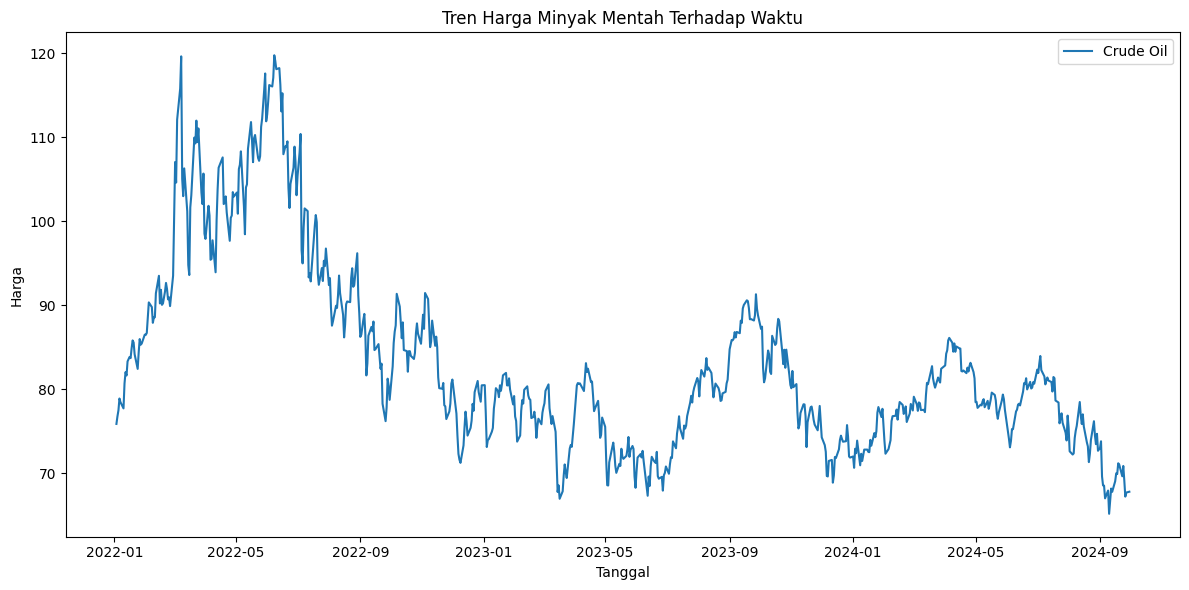

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot
plt.figure(figsize=(12, 6))

# plot crude oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Crude Oil')

# Tambahkan judul dan label Crude Oil
plt.title('Tren Harga Minyak Mentah Terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Tampilkan plot
plt.show()

# Simpan
plt.savefig(os.path.join(output_dir, 'tren_harga_crude_oil_terhadap_waktu.png'))

## Analisis Eksplorasi Data

Ada beberapa yang perlu diekplorasi terkait Crude Oil ini.

- pada plot meskipun date tidak `ascending` plot untungnya tetap dalam keadaan baik. Tapi, pada forecasting `date` harus dalam keadaan `ascending`
- lebih lanjut terkait plot

In [ ]:
# sort dahulu sesuai date agar ascending
dataset_crudeOil.sort_values(by='date', inplace=True)

#### Tren Terkait plot

pada bulan oktober 2022, sebut saja 2022-10-01. Harga Crude Oil memiliki perubahan variansi. Sebelum itu harga per kilang nya sangat tinggi, tapi setelah oktober harga mulai rendah. Namun, itu hanya bertahan sampai juli 2023, setelahnya tinggi kembali sampai desember 2023. Meskipun tidak setinggi di 2022. Setelah januari 2023 sampai september 2024, variansi cukup bisa dibilang konstan.

Bisa dilihat pada plot dibawah ini

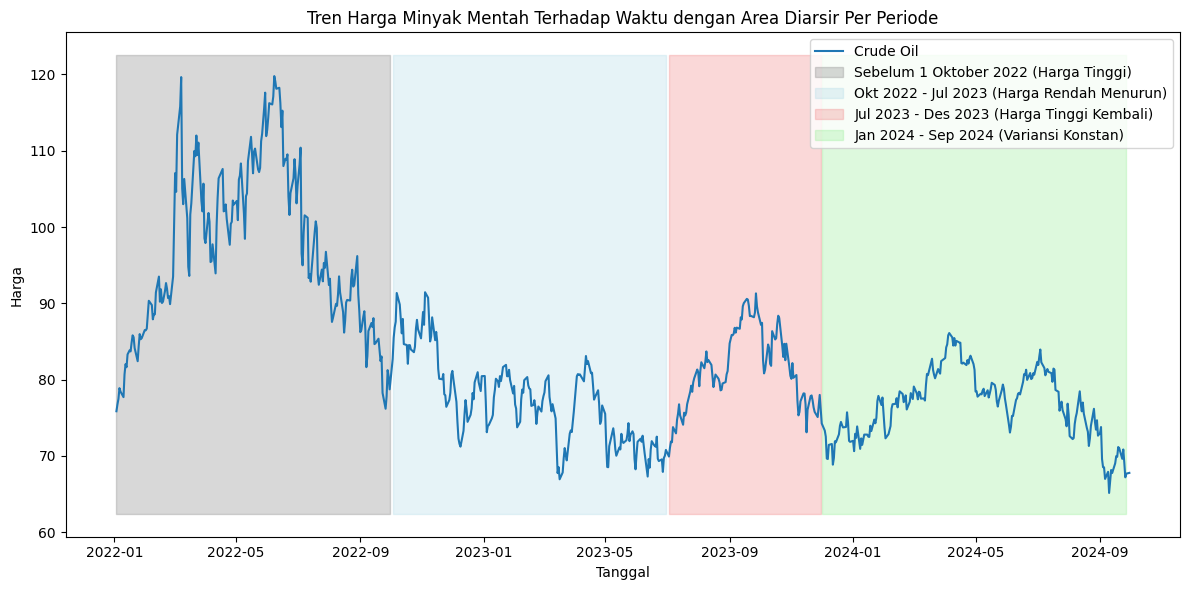

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot dengan beberapa area yang diarsir
plt.figure(figsize=(12, 6))

# Plot harga Crude Oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Crude Oil')

# Definisikan tanggal batas untuk setiap periode
date_boundary_1 = pd.to_datetime('2022-10-01')
date_boundary_2 = pd.to_datetime('2023-07-01')
date_boundary_3 = pd.to_datetime('2023-12-01')
date_boundary_4 = pd.to_datetime('2024-09-30') # Asumsi batas akhir data

# Dapatkan batas sumbu y
y_min, y_max = plt.gca().get_ylim()

# Arsir area untuk setiap periode
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=(dataset_crudeOil['date'] < date_boundary_1), color='gray', alpha=0.3, label='Sebelum 1 Oktober 2022 (Harga Tinggi)')
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=((dataset_crudeOil['date'] >= date_boundary_1) & (dataset_crudeOil['date'] < date_boundary_2)), color='lightblue', alpha=0.3, label='Okt 2022 - Jul 2023 (Harga Rendah Menurun)')
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=((dataset_crudeOil['date'] >= date_boundary_2) & (dataset_crudeOil['date'] < date_boundary_3)), color='lightcoral', alpha=0.3, label='Jul 2023 - Des 2023 (Harga Tinggi Kembali)')
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=((dataset_crudeOil['date'] >= date_boundary_3) & (dataset_crudeOil['date'] < date_boundary_4)), color='lightgreen', alpha=0.3, label='Jan 2024 - Sep 2024 (Variansi Konstan)')

# Buat keterangan plot
plt.title('Tren Harga Minyak Mentah Terhadap Waktu dengan Area Diarsir Per Periode')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()

# Tampilkan plot
plt.show()

# Simpan
plt.savefig(os.path.join(output_dir, 'tren_harga_crude_oil_terhadap_waktu_area_diarsir.png'))

#### Gradien pada masing-masing bagian plot

dengan melihat perubahan harga harian kita bisa melihat gradiennya

Periode: Sebelum 1 Okt 2022 (Harga Tinggi) - Gradien Regresi: -0.0014
Periode: Okt 2022 - Jul 2023 (Harga Rendah Menurun) - Gradien Regresi: -0.0545
Periode: Jul 2023 - Des 2023 (Harga Tinggi Kembali) - Gradien Regresi: 0.0221
Periode: Jan 2024 - Sep 2024 (Variansi Konstan) - Gradien Regresi: -0.0029


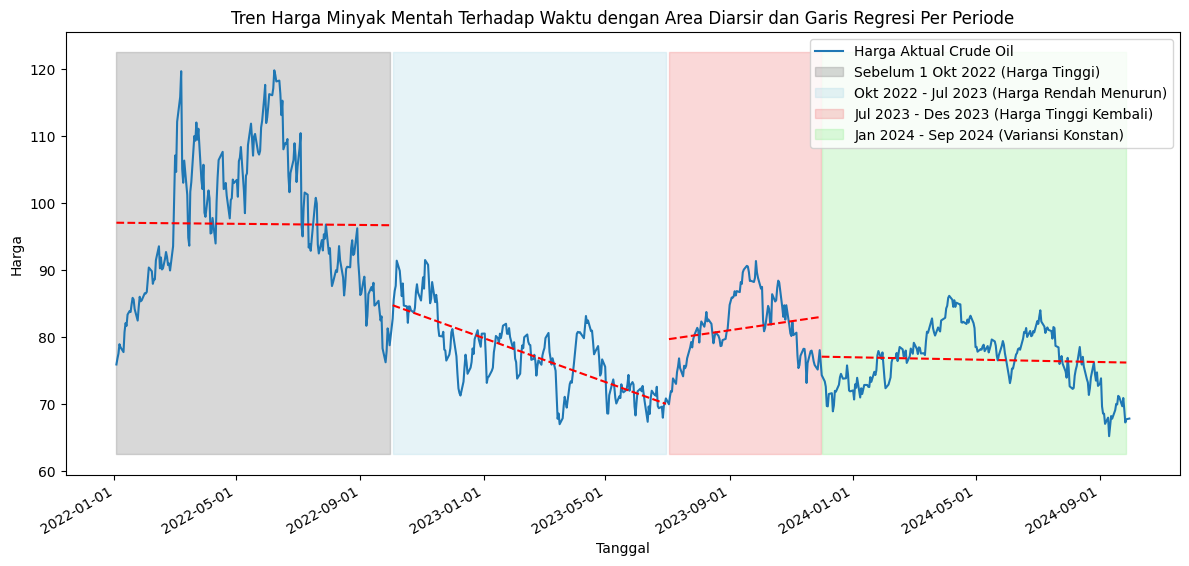

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# Definisikan tanggal batas untuk setiap periode
date_boundary_1 = pd.to_datetime('2022-10-01')
date_boundary_2 = pd.to_datetime('2023-07-01')
date_boundary_3 = pd.to_datetime('2023-12-01')
date_boundary_4 = pd.to_datetime('2024-09-30') # Asumsi batas akhir data

# Buat daftar periode dan labelnya
periods = [
    (dataset_crudeOil['date'].min(), date_boundary_1, 'gray', 'Sebelum 1 Okt 2022 (Harga Tinggi)'),
    (date_boundary_1, date_boundary_2, 'lightblue', 'Okt 2022 - Jul 2023 (Harga Rendah Menurun)'),
    (date_boundary_2, date_boundary_3, 'lightcoral', 'Jul 2023 - Des 2023 (Harga Tinggi Kembali)'),
    (date_boundary_3, date_boundary_4, 'lightgreen', 'Jan 2024 - Sep 2024 (Variansi Konstan)')
]

# Plot dengan area diarsir dan garis regresi per periode
plt.figure(figsize=(12, 6))

# Plot harga Crude Oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Harga Aktual Crude Oil')

# Dapatkan batas sumbu y
y_min, y_max = plt.gca().get_ylim()

# Loop melalui setiap periode untuk mengarsir dan menghitung regresi
for start_date, end_date, color, label in periods:
    # Filter data untuk periode saat ini
    period_data = dataset_crudeOil[(dataset_crudeOil['date'] >= start_date) & (dataset_crudeOil['date'] < end_date)].copy()

    if not period_data.empty:
        # Arsir area untuk periode saat ini
        plt.fill_between(period_data['date'], y_min, y_max, color=color, alpha=0.3, label=label)

        # Hitung hari sejak awal periode ini
        period_data['days_since_period_start'] = (period_data['date'] - period_data['date'].min()).dt.days

        # Siapkan data untuk regresi linier
        X_period = period_data[['days_since_period_start']].values
        y_period = period_data['price'].values

        # Lakukan regresi linier
        model_period = LinearRegression()
        model_period.fit(X_period, y_period)

        # Prediksi harga untuk periode ini
        predictions_period = model_period.predict(X_period)

        # Plot garis regresi untuk periode ini
        plt.plot(period_data['date'], predictions_period, color='red', linestyle='--') # Gunakan warna yang berbeda atau gaya garis untuk membedakan

        # Opsional: Cetak gradien untuk setiap periode
        slope_period = model_period.coef_[0]
        print(f"Periode: {label} - Gradien Regresi: {slope_period:.4f}")


# Tambahkan keterangan plot
plt.title('Tren Harga Minyak Mentah Terhadap Waktu dengan Area Diarsir dan Garis Regresi Per Periode')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend(loc='upper right')
plt.tight_layout()

# Pastikan label sumbu x menampilkan tanggal dengan benar
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

# Tampilkan plot
plt.show()

# Simpan
plt.savefig(os.path.join(output_dir, 'tren_harga_crude_oil_terhadap_waktu_area_diarsir_garis_regresi_1.png'))

sepertinya menarik, kalau kita lihat daripada batas pertama pada 1 oktober 2022, tapi, 9 juni 2022.

Periode: Sebelum 9 Juni 2022 (Harga Tinggi Meningkat) - Gradien Regresi: 0.2078
Periode: Juni 2022 - Jul 2023 (Harga Rendah Menurun) - Gradien Regresi: -0.0819
Periode: Jul 2023 - Des 2023 (Harga Naik Kembali) - Gradien Regresi: 0.0221
Periode: Jan 2024 - Sep 2024 (Variansi Konstan) - Gradien Regresi: -0.0029


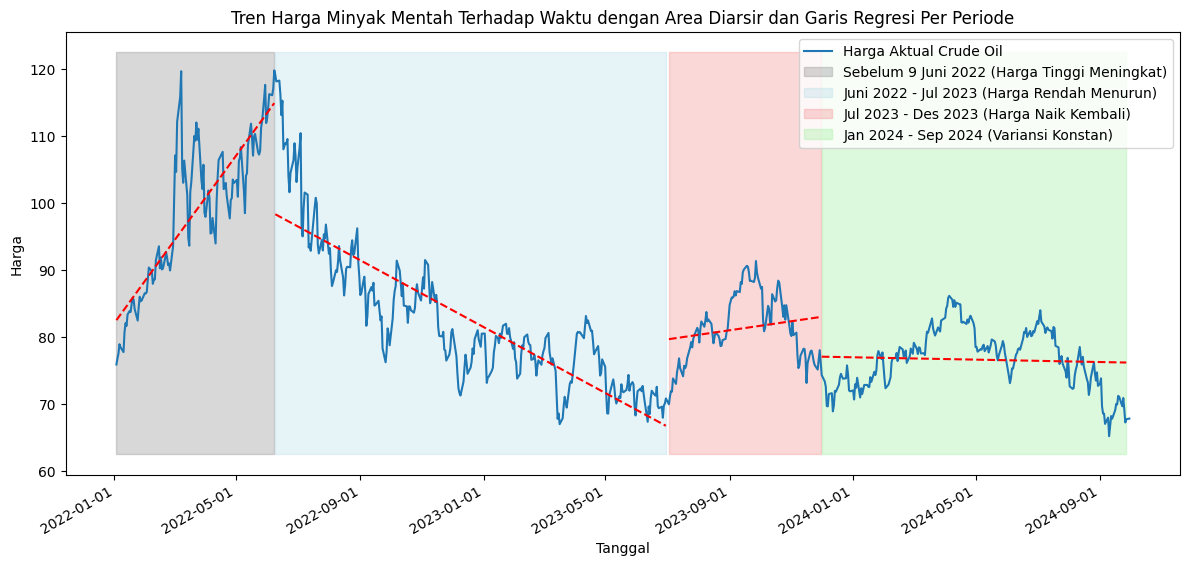

<Figure size 640x480 with 0 Axes>

In [ ]:
# Definisikan tanggal batas untuk setiap periode
date_boundary_1 = pd.to_datetime('2022-06-9')
date_boundary_2 = pd.to_datetime('2023-07-01')
date_boundary_3 = pd.to_datetime('2023-12-01')
date_boundary_4 = pd.to_datetime('2024-09-30')

# Buat daftar periode dan labelnya
periods = [
    (dataset_crudeOil['date'].min(), date_boundary_1, 'gray', 'Sebelum 9 Juni 2022 (Harga Tinggi Meningkat)'),
    (date_boundary_1, date_boundary_2, 'lightblue', 'Juni 2022 - Jul 2023 (Harga Rendah Menurun)'),
    (date_boundary_2, date_boundary_3, 'lightcoral', 'Jul 2023 - Des 2023 (Harga Naik Kembali)'),
    (date_boundary_3, date_boundary_4, 'lightgreen', 'Jan 2024 - Sep 2024 (Variansi Konstan)')
]

# Plot dengan area diarsir dan garis regresi per periode
plt.figure(figsize=(12, 6))

# Plot harga Crude Oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Harga Aktual Crude Oil')

# Dapatkan batas sumbu y
y_min, y_max = plt.gca().get_ylim()

# Loop melalui setiap periode untuk mengarsir dan menghitung regresi
for start_date, end_date, color, label in periods:
    # Filter data untuk periode saat ini
    period_data = dataset_crudeOil[(dataset_crudeOil['date'] >= start_date) & (dataset_crudeOil['date'] < end_date)].copy()

    if not period_data.empty:
        # Arsir area untuk periode saat ini
        plt.fill_between(period_data['date'], y_min, y_max, where=((period_data['date'] >= start_date) & (period_data['date'] < end_date)), color=color, alpha=0.3, label=label)
        # Hitung hari sejak awal periode ini
        period_data['days_since_period_start'] = (period_data['date'] - period_data['date'].min()).dt.days

        # Siapkan data untuk regresi linier
        X_period = period_data[['days_since_period_start']].values
        y_period = period_data['price'].values

        # Lakukan regresi linier
        model_period = LinearRegression()
        model_period.fit(X_period, y_period)

        # Prediksi harga untuk periode ini
        predictions_period = model_period.predict(X_period)

        # Plot garis regresi untuk periode ini
        plt.plot(period_data['date'], predictions_period, color='red', linestyle='--')

        # Cetak gradien untuk setiap periode
        slope_period = model_period.coef_[0]
        print(f"Periode: {label} - Gradien Regresi: {slope_period:.4f}")


# Tambahkan keterangan plot
plt.title('Tren Harga Minyak Mentah Terhadap Waktu dengan Area Diarsir dan Garis Regresi Per Periode')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend(loc='upper right')
plt.tight_layout()

# Pastikan label sumbu x menampilkan tanggal dengan benar
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

# Tampilkan plot
plt.show()


# Simpan
plt.savefig(os.path.join(output_dir, 'tren_harga_crude_oil_terhadap_waktu_area_diarsir_garis_regresi_2.png'))

Dari Melihat tren dari plot dan menganalisis gradien garis regresi pada periode-periode yang berbeda di atas kita mengidentifikasi bahwa variansi data kemungkinan besar tidak konstan, yang merupakan indikasi kuat bahwa deret waktu tersebut tidak stasioner.

Berikut alasannya:

1. **Tren dan Variansi**: Keberadaan tren (yaitu, rata-rata deret waktu berubah seiring waktu) adalah salah satu karakteristik utama dari deret waktu non-stasioner. Namun, seringkali, data dengan tren juga menunjukkan **variansi yang tidak konstan**. kita bisa melihat ini pada plot harga minyak mentah kita: periode dengan harga tinggi (seperti sebelum Juni 2022 dan Juli-Desember 2023) cenderung memiliki fluktuasi atau "lebarnya" data yang lebih besar dibandingkan periode dengan harga yang lebih rendah (seperti Juni 2022 - Juli 2023 dan Januari 2024 - September 2024). Artinya, variansi di periode harga tinggi lebih besar.

2. **Analisis Gradien Antar Periode**: Ketika kita menghitung gradien garis regresi untuk periode yang berbeda dan mengamati bahwa gradien tersebut berubah secara signifikan (dalam nilai dan/atau tanda), ini tidak hanya menunjukkan perubahan tren, tetapi juga bisa mengindikasikan perubahan dalam "perilaku" deret waktu. Perubahan perilaku ini seringkali mencakup perubahan dalam volatilitas atau variansi. Periode dengan gradien yang lebih curam atau dengan fluktuasi yang lebih besar di sekitar garis regresi mungkin memiliki variansi yang lebih tinggi.

3. **Plot Residual Regresi**: Meskipun kita belum melakukan ini secara eksplisit, langkah selanjutnya yang logis setelah regresi adalah melihat plot residual (perbedaan antara harga aktual dan harga yang diprediksi oleh garis regresi) untuk setiap periode. Jika plot residual menunjukkan pola yang melebar atau menyempit seiring waktu, ini adalah bukti visual yang kuat bahwa variansi tidak konstan (heteroskedastisitas).

Tapi, itu tidak akan kita lakukan disini.

4. Dalam konteks forecasting, terutama untuk model seperti ARIMA yang mengasumsikan stasioneritas, mengidentifikasi bahwa variansi tidak konstan itu penting. Differencing (komponen 'I' dalam ARIMA) dapat membantu menstabilkan rata-rata, tetapi tidak selalu menstabilkan variansi. Jika setelah differencing data masih menunjukkan variansi yang tidak konstan, kita mungkin perlu mempertimbangkan transformasi data tambahan (seperti transformasi logaritma atau Box-Cox) sebelum menerapkan model ARIMA, atau menggunakan model forecasting lain yang dapat menangani heteroskedastisitas (seperti model ARCH/GARCH, yang sering digunakan untuk memodelkan volatilitas di pasar keuangan).

---

Dari gradien visualisasi mendapatkan beberapa informasi penting:

1. Arah Tren: Gradien (slope) garis regresi menunjukkan arah tren harga minyak mentah pada periode tersebut.

  - Jika gradien positif, berarti harga cenderung meningkat seiring waktu pada periode tersebut.
  - Jika gradien negatif, berarti harga cenderung menurun seiring waktu pada periode tersebut.
  - Jika gradien mendekati nol, berarti harga cenderung stabil atau perubahannya kecil pada periode tersebut.


2. **Tingkat Perubahan**: Nilai absolut gradien menunjukkan seberapa cepat harga berubah.

  - Gradien dengan nilai absolut besar (baik positif maupun negatif) menunjukkan perubahan harga yang cepat.
  - Gradien dengan nilai absolut kecil menunjukkan perubahan harga yang lambat.

3. Perbandingan Antar Periode: Dengan membandingkan gradien dari periode-periode yang berbeda, kita bisa melihat bagaimana laju perubahan harga berfluktuasi seiring waktu. Ini mengkonfirmasi observasi kita visual tentang adanya perubahan variansi atau tren pada periode-periode tertentu.

4. Ringkasan Tren Keseluruhan (untuk garis regresi total): Gradien dari garis regresi yang dihitung untuk seluruh dataset memberikan gambaran umum tentang tren harga minyak mentah selama periode keseluruhan data yang tersedia.


gradien ini memberikan indikasi awal tentang tren rata-rata di setiap periode, tetapi untuk pemodelan yang lebih akurat, kita perlu mempertimbangkan struktur deret waktu secara keseluruhan (autokorelasi, musiman, dll.) setelah stasionerisasi.

#### Uji Stationeritas (Augmented Dickey-Fuller Test)

Dari analisis visual pada tren harga Crude Oil WTI, kita mengamati adanya perubahan signifikan dalam rata-rata dan variansi dari waktu ke waktu. Ini memberikan indikasi awal bahwa deret waktu ini tidak stasioner.

Untuk mengkonfirmasi secara statistik, kita melakukan Uji Augmented Dickey-Fuller (ADF) pada deret waktu harga asli.

### Hasil Uji ADF pada Harga Asli:

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Lakukan uji ADF pada kolom 'price' dari dataset_crudeOil
# pastikan dataset_crudeOil sudah diurutkan berdasarkan tanggal seperti yang sudah Anda lakukan sebelumnya
adf_result = adfuller(dataset_crudeOil['price'])

# Cetak hasil uji ADF
print(f'Hasil Uji ADF:')
print(f'Statistik ADF: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Jumlah lag: {adf_result[2]}')
print(f'Jumlah observasi: {adf_result[3]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpretasi hasil
alpha = 0.05 # Tingkat signifikansi
print('\nInterpretasi:')
if adf_result[1] <= alpha:
    print(f'p-value ({adf_result[1]:.4f}) <= alpha ({alpha})')
    print('Tolak hipotesis nol: Deret waktu kemungkinan STASIONER.')
else:
    print(f'p-value ({adf_result[1]:.4f}) > alpha ({alpha})')
    print('Gagal menolak hipotesis nol: Deret waktu kemungkinan NON-STASIONER.')


Hasil Uji ADF:
Statistik ADF: -1.4376154729359651
p-value: 0.564115927289219
Jumlah lag: 8
Jumlah observasi: 716
Critical Values:
   1%: -3.439516060164992
   5%: -2.8655850998755263
   10%: -2.5689240826597173

Interpretasi:
p-value (0.5641) > alpha (0.05)
Gagal menolak hipotesis nol: Deret waktu kemungkinan NON-STASIONER.


**Interpretasi Hasil Uji ADF:**

- **Hipotesis Nol (H0):** Deret waktu memiliki unit root dan non-stasioner.
- **Hipotesis Alternatif (H1):** Deret waktu tidak memiliki unit root dan stasioner.

**Interpretasi:**

*   **Statistik ADF:** -1.4376154729359651.
*   **p-value:** 0.564115927289219.
*   **Critical Values:**

   1%  : -3.439516060164992

   5%  : -2.8655850998755263
   
   10% : -2.5689240826597173.

Dengan tingkat signifikansi (alpha) sebesar 0.05, kita membandingkan p-value hasil uji ADF dengan alpha.

Karena **p-value (0.564115927289219) lebih besar dari alpha (0.05)**, kita **gagal menolak hipotesis nol**. Hipotesis nol dari Uji ADF adalah bahwa deret waktu memiliki unit root dan oleh karena itu non-stasioner.

**Kesimpulan dari Uji ADF pada Harga Asli:** Uji ADF secara statistik mengkonfirmasi observasi visual kita bahwa deret waktu harga Crude Oil WTI **kemungkinan non-stasioner**.

### Stasionerisasi Melalui Differencing Orde Pertama

Karena deret waktu asli non-stasioner, langkah selanjutnya untuk persiapan pemodelan ARIMA adalah melakukan differencing. Differencing orde pertama menghitung perubahan harian pada harga.

Kita membuat kolom baru `price_diff1` yang berisi perbedaan antara harga saat ini dan harga pada hari sebelumnya. Baris pertama yang memiliki nilai NaN dihapus.

#### Melakukan Differencing Orde Pertama

Karena Uji ADF sebelumnya menunjukkan bahwa deret waktu harga minyak mentah adalah non-stasioner, langkah selanjutnya adalah melakukan differencing orde pertama untuk mencoba menstasionerkannya. Differencing orde pertama menghitung perbedaan antara nilai saat ini dan nilai pada periode sebelumnya.


In [ ]:
# Lakukan differencing orde pertama pada kolom 'price'
dataset_crudeOil['price_diff1'] = dataset_crudeOil['price'].diff()

# Hapus baris pertama yang akan menghasilkan nilai NaN setelah differencing
dataset_crudeOil_diff1 = dataset_crudeOil.dropna(subset=['price_diff1']).copy()

# Tampilkan beberapa baris pertama dari dataset setelah differencing
print("Dataset setelah differencing orde pertama:")
print(dataset_crudeOil_diff1.head())


Dataset setelah differencing orde pertama:
          date  price   open   high    low     vol-k  change-%  price_diff1
723 2022-01-04  76.74  75.80  77.40  75.47  156450.0      1.17         0.89
722 2022-01-05  77.47  76.88  78.16  76.25  197970.0      0.95         0.73
721 2022-01-06  78.88  76.79  79.56  76.28  244000.0      1.82         1.41
720 2022-01-07  78.44  79.00  79.82  78.07  229280.0     -0.56        -0.44
719 2022-01-10  77.70  78.51  78.92  77.34  210840.0     -0.94        -0.74


#### Visualisasi Deret Waktu Setelah Differencing

Melihat plot deret waktu yang sudah didifferencing dapat memberikan indikasi visual apakah tren sudah tereliminasi.


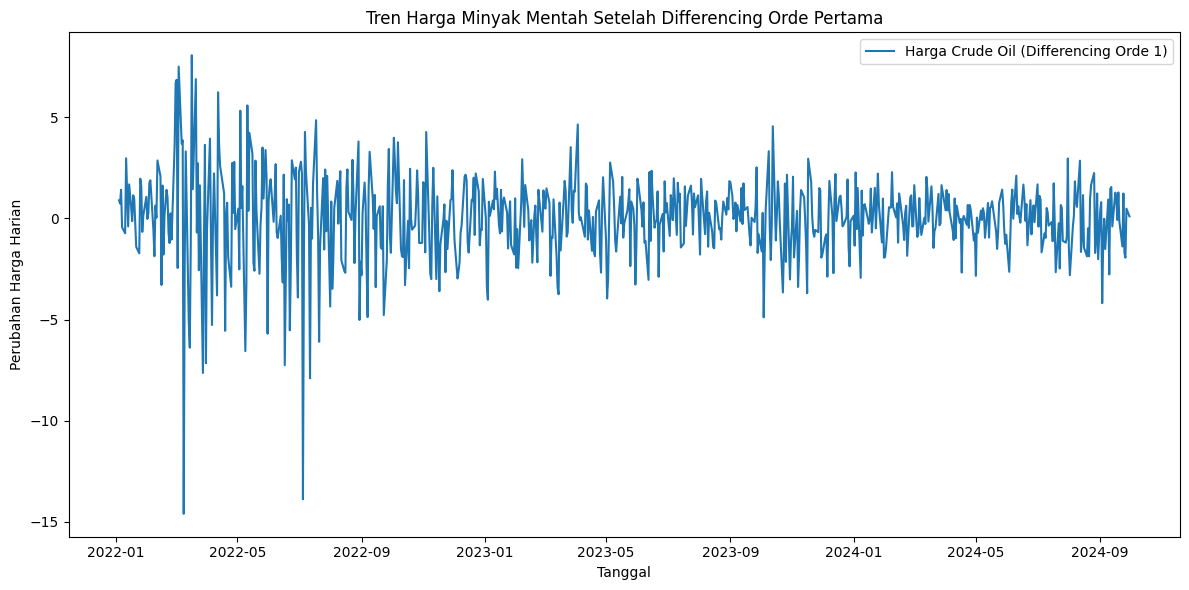

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot deret waktu setelah differencing orde pertama
plt.figure(figsize=(12, 6))
plt.plot(dataset_crudeOil_diff1['date'], dataset_crudeOil_diff1['price_diff1'], label='Harga Crude Oil (Differencing Orde 1)')
plt.title('Tren Harga Minyak Mentah Setelah Differencing Orde Pertama')
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga Harian')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Simpan
plt.savefig(os.path.join(output_dir, 'tren_harga_crude_oil_terhadap_waktu_setelah_differencing_biasa.png'))

#### Uji Stationeritas Kembali (ADF Test) Setelah Differencing
Setelah melakukan differencing, penting untuk menguji kembali apakah deret waktu yang dihasilkan sekarang stasioner. Kita akan menggunakan kembali Uji Augmented Dickey-Fuller.


In [ ]:
# Lakukan uji ADF pada kolom 'price_diff1'
adf_result_diff1 = adfuller(dataset_crudeOil_diff1['price_diff1'])

# Cetak hasil uji ADF
print(f'Hasil Uji ADF Setelah Differencing Orde Pertama:')
print(f'Statistik ADF: {adf_result_diff1[0]}')
print(f'p-value: {adf_result_diff1[1]}')
print(f'Jumlah lag: {adf_result_diff1[2]}')
print(f'Jumlah observasi: {adf_result_diff1[3]}')
print('Critical Values:')
for key, value in adf_result_diff1[4].items():
    print(f'   {key}: {value}')

# Interpretasi hasil
alpha = 0.05 # Tingkat signifikansi
print('\nInterpretasi:')
if adf_result_diff1[1] <= alpha:
    print(f'p-value ({adf_result_diff1[1]:.4f}) <= alpha ({alpha})')
    print('Tolak hipotesis nol: Deret waktu (setelah differencing) kemungkinan STASIONER.')
else:
    print(f'p-value ({adf_result_diff1[1]:.4f}) > alpha ({alpha})')
    print('Gagal menolak hipotesis nol: Deret waktu (setelah differencing) kemungkinan NON-STASIONER.')


Hasil Uji ADF Setelah Differencing Orde Pertama:
Statistik ADF: -12.267831813688266
p-value: 8.777759270918779e-23
Jumlah lag: 7
Jumlah observasi: 716
Critical Values:
   1%: -3.439516060164992
   5%: -2.8655850998755263
   10%: -2.5689240826597173

Interpretasi:
p-value (0.0000) <= alpha (0.05)
Tolak hipotesis nol: Deret waktu (setelah differencing) kemungkinan STASIONER.


**Interpretasi:**

*   **Statistik ADF:** -12.267831813688266.
*   **p-value:** 8.777759270918779e-23.
*   **Critical Values:**

   1% : -3.439516060164992
   
   5% : -2.8655850998755263
   
   10% : -2.5689240826597173

Kembali membandingkan p-value dengan alpha (0.05):

Karena **p-value (8.777759270918779e-23) lebih kecil atau sama dengan alpha (0.05)**, kita **menolak hipotesis nol**.

**Kesimpulan dari Uji ADF Setelah Differencing:** Hasil Uji ADF menunjukkan bahwa deret waktu harga Crude Oil WTI setelah differencing orde pertama **kemungkinan STASIONER**. Ini berarti kita telah berhasil menstasionerkan deret waktu untuk keperluan pemodelan ARIMA, dan orde differencing ('d') untuk model kita adalah 1.

---

### Analisis Autokorelasi (ACF & PACF)

Setelah berhasil menstasionerkan deret waktu harga Crude Oil WTI melalui differencing orde pertama, langkah selanjutnya dalam proses identifikasi model ARIMA adalah menganalisis struktur autokorelasi yang tersisa dalam data yang stasioner. Analisis ini dilakukan dengan melihat plot Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF).

-   **ACF (Autocorrelation Function):** Mengukur korelasi antara deret waktu dan nilai lag-nya pada berbagai jeda waktu, termasuk korelasi langsung dan tidak langsung (yang diteruskan melalui lag-lag sebelumnya).
-   **PACF (Partial Autocorrelation Function):** Mengukur korelasi langsung antara deret waktu dan nilai lag-nya pada berbagai jeda waktu, setelah menghilangkan pengaruh korelasi dari lag-lag sebelumnya.

Plot-plot ini akan membantu kita dalam menentukan ordo autoregressive (p) dan moving average (q) dari model ARIMA(p, 1, q).


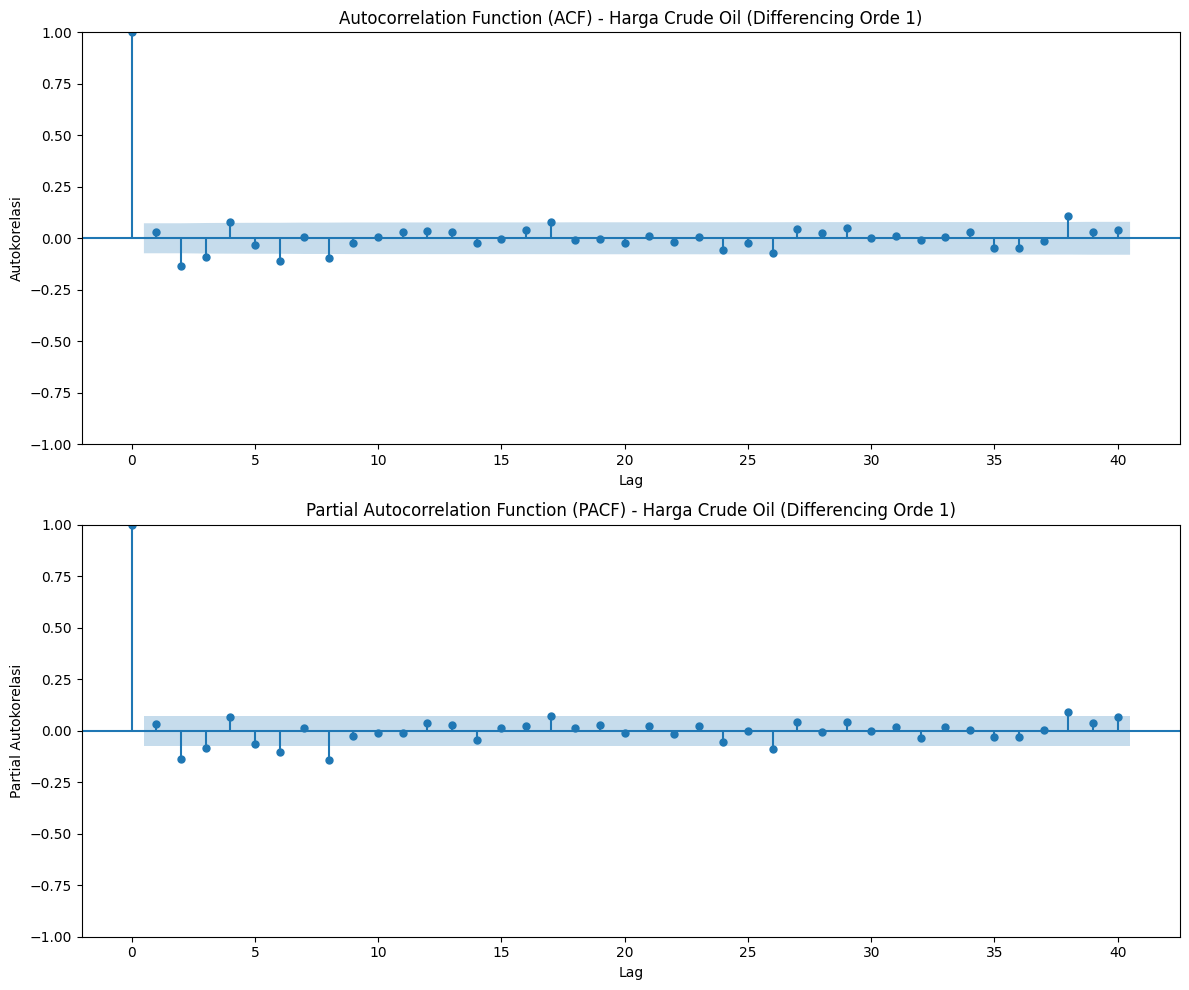

<Figure size 640x480 with 0 Axes>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Membuat subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot ACF
plot_acf(dataset_crudeOil_diff1['price_diff1'], ax=axes[0], lags=40) # Anda bisa menyesuaikan jumlah lag
axes[0].set_title('Autocorrelation Function (ACF) - Harga Crude Oil (Differencing Orde 1)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Autokorelasi')
axes[0].grid(False) # Opsional, matikan grid agar lebih jelas

# Plot PACF
plot_pacf(dataset_crudeOil_diff1['price_diff1'], ax=axes[1], lags=40) # Pastikan menggunakan metode 'ywm' atau 'ols' jika versi statsmodels Anda memerlukan
axes[1].set_title('Partial Autocorrelation Function (PACF) - Harga Crude Oil (Differencing Orde 1)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Partial Autokorelasi')
axes[1].grid(False) # Opsional, matikan grid agar lebih jelas

plt.tight_layout()
plt.show()

# Simpan
plt.savefig(os.path.join(output_dir, 'acf_pacf_harga_crude_oil.png'))

### Interpretasi Awal Plot ACF dan PACF

Plot ACF dan PACF dari deret waktu harga minyak mentah yang telah didifferencing memberikan wawasan penting mengenai struktur korelasi yang dapat dimodelkan.

Garis biru pada plot menunjukkan interval kepercayaan 95%. Batang (bar) yang melampaui garis biru ini dianggap signifikan secara statistik.

**Observasi Umum dari Plot ACF dan PACF:**

-   **Pola ACF:** Terlihat batang signifikan pada lag 1 dan kemudian sebagian besar batang lainnya tidak signifikan. Ini mengindikasikan mungkin ada komponen Moving Averaga (MA)
-   **Pola PACF:** Terlihat batang signifikan pada lag 1 dan kemudian sebagian besar batang lainnya tidak signifikan. Ini mengindikasikan mungkin ada komponen Autoregressive (AR).

**Hubungan dengan Ordo ARIMA:**

-   **Ordo p (AR):** Ditentukan oleh **jeda signifikan terakhir pada plot PACF** sebelum sebagian besar lag menjadi tidak signifikan. Jika PACF "cut off" setelah lag k, maka p kemungkinan adalah k.
-   **Ordo q (MA):** Ditentukan oleh **jeda signifikan terakhir pada plot ACF** sebelum sebagian besar lag menjadi tidak signifikan. Jika ACF "cut off" setelah lag k, maka q kemungkinan adalah k.
-   **Ordo d (Differencing):** Kita sudah tentukan dari uji stasioneritas bahwa **d = 1**.

Berdasarkan pengamatan ini, kita akan menggunakan plot ACF dan PACF ini di section berikutnya untuk secara lebih formal menentukan nilai p dan q yang paling sesuai untuk model ARIMA(p, 1, q) yang akan kita latih untuk peramalan harga Crude Oil.

---

# Kesimpulan dari Exploratory Data Analysis (EDA)

Berdasarkan serangkaian analisis eksplorasi yang telah dilakukan pada dataset harga Crude Oil WTI, berikut adalah kesimpulan utama yang relevan untuk persiapan pemodelan forecasting:

### 1. Data Bersih dan Siap Digunakan
- Dataset Crude Oil WTI telah berhasil dimuat dengan benar dan kolom tanggal (`date`) sudah dikonversi ke tipe data datetime.
- Tidak ditemukan adanya nilai yang hilang (NaN), sehingga data cukup lengkap untuk analisis deret waktu dalam rentang tanggal **2022-01-03** hingga **2024-09-30**.

### 2. Keberadaan Tren dan Variansi Tidak Konstan
- Visualisasi plot harga terhadap waktu dengan jelas menunjukkan adanya **tren yang berubah-ubah** di berbagai periode, tidak menunjukkan pola pertumbuhan atau penurunan yang stabil secara keseluruhan.
- Analisis lebih lanjut, termasuk observasi visual pada periode harga tinggi vs. rendah, mengindikasikan adanya **variansi yang tidak konstan (heteroskedastisitas)**, di mana fluktuasi harga cenderung lebih besar saat harga berada pada level yang lebih tinggi.

### 3. Konfirmasi Non-Stasioneritas Melalui Uji ADF
- Untuk mengkonfirmasi observasi visual, kami melakukan Uji Augmented Dickey-Fuller (ADF) pada deret waktu harga asli.
- Hasil uji ADF menunjukkan p-value sebesar **0.564115927289219**. Karena nilai ini **Lebih besar** dari tingkat signifikansi umum 0.05, kami **Gagal menolak** hipotesis nol.
- **Kesimpulan:** Uji ADF secara statistik mengkonfirmasi bahwa deret waktu harga Crude Oil WTI asli **kemungkinan non-stasioner**.

### 4. Stasionerisasi yang Berhasil dengan Differencing
- Sebagai respons terhadap non-stasioneritas, kami melakukan differencing orde pertama pada deret waktu harga.
- Uji ADF kembali dilakukan pada deret waktu yang telah didifferencing.
- Hasil uji ADF pada data yang didifferencing menunjukkan p-value sebesar **8.777759270918779e-23**. Karena nilai ini **Lebih kecil** dari 0.05, kami **Menolak** hipotesis nol.
- **Kesimpulan:** Deret waktu harga Crude Oil WTI setelah differencing orde pertama **kemungkinan stasioner**. Ini menetapkan orde differencing (d) untuk model ARIMA menjadi 1.

### 5. Struktur Autokorelasi dalam Data Stasioner
- Analisis visual melalui plot Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF) dari deret waktu yang telah didifferencing memberikan wawasan tentang pola korelasi sisa yang dapat dimodelkan.
- Plot ACF menunjukkan batang signifikan pada lag awal yang kemudian cut off.
- Plot PACF menunjukkan batang signifikan pada lag awal yang kemudian cut off.
- Pola-pola ini akan menjadi panduan penting dalam menentukan ordo autoregressive (p) dan moving average (q) dari model ARIMA.

---

## Langkah Selanjutnya: Pemodelan ARIMA

Berdasarkan temuan kunci dari EDA ini, terutama konfirmasi non-stasioneritas yang berhasil diatasi dengan differencing (d=1) dan analisis struktur autokorelasi sisa melalui plot ACF/PACF, kita sekarang siap untuk melanjutkan ke section pemodelan.

Pada section berikutnya, kita akan:

1.  **Menentukan Ordo (p, q) Model ARIMA:** Menggunakan plot ACF dan PACF dari data yang stasioner untuk mengidentifikasi ordo p (autoregressive) dan q (moving average) yang paling sesuai.
2.  **Menerapkan Model ARIMA:** Membangun dan melatih model ARIMA(p, 1, q) menggunakan pustaka `statsmodels`.
3.  **Mengevaluasi Kinerja Model:** Melakukan diagnostik pada residual model untuk memastikan asumsi model terpenuhi.
4.  **Melakukan Peramalan (Forecasting):** Menggunakan model yang telah dilatih untuk memprediksi harga Crude Oil WTI di masa depan.

Langkah-langkah ini akan memungkinkan kita untuk memanfaatkan struktur temporal data dan non-stasioneritasnya yang telah diatasi untuk menghasilkan peramalan yang akurat.



In [ ]:
# Khsusus di colab
from google.colab import files

# 1. Tentukan jalur folder yang ingin diunduh relatif terhadap notebook saat ini
output_folder_relative_path = '../output'

# Dapatkan jalur absolut dari folder output
output_folder_abs_path = os.path.abspath(output_folder_relative_path)

# Dapatkan direktori parent dari folder output
output_parent_dir = os.path.dirname(output_folder_abs_path)

# Dapatkan hanya nama folder output (basename)
output_folder_name = os.path.basename(output_folder_abs_path)

# 2. Tentukan nama file ZIP yang akan dibuat
zip_filename = f'{output_folder_name}.zip'

# Simpan direktori kerja saat ini
original_dir = os.getcwd()

# 3. Kompres folder menjadi file ZIP
try:
    # Pindah ke direktori parent dari folder output
    os.chdir(output_parent_dir)

    # Lakukan perintah zip pada nama folder output (relatif terhadap direktori parent)
    zip_command = f'zip -r {zip_filename} {output_folder_name}'
    print(f"Menjalankan perintah zip: {zip_command}")
    !{zip_command}

    print(f"File ZIP '{zip_filename}' berhasil dibuat di '{output_parent_dir}'.")

    # 4. Unduh file ZIP
    # file zip ada di direktori parent, jadi unduh dari sana
    zip_file_to_download = os.path.join(output_parent_dir, zip_filename)
    print(f"Mengunduh file: {zip_file_to_download}")

    # Pastikan file zip ada sebelum mencoba mengunduhnya
    if os.path.exists(zip_filename): # Cek di direktori saat ini (yang sekarang adalah output_parent_dir)
        print(f"Mengunduh '{zip_filename}'...")
        files.download(zip_filename) # Unduh file dari direktori saat ini
    else:
        print(f"Gagal membuat file ZIP '{zip_filename}'. Periksa jalur folder atau perintah zip.")


except FileNotFoundError:
    print(f"Direktori parent '{output_parent_dir}' tidak ditemukan.")
    print("Tidak dapat melanjutkan proses zip dan unduh.")

finally:
    # 5. Kembali ke direktori asli notebook
    os.chdir(original_dir)
    print(f"Kembali ke direktori asli: {os.getcwd()}")

    # 6. Opsional: Hapus file ZIP setelah diunduh
    # Hapus file zip dari direktori parent
    # import time
    # time.sleep(5) # Beri jeda 5 detik
    # zip_file_abs_path = os.path.join(output_parent_dir, zip_filename)
    # if os.path.exists(zip_file_abs_path):
    #     os.remove(zip_file_abs_path)
    #     print(f"File ZIP '{zip_file_abs_path}' dihapus dari Colab.")

Jalur absolut folder output: /output
Direktori parent folder output: /
Nama folder output: output
Nama file ZIP: output.zip
Direktori kerja asli: /
Berpindah ke direktori: /
Menjalankan perintah zip: zip -r output.zip output
  adding: output/ (stored 0%)
  adding: output/media/ (stored 0%)
  adding: output/media/EDA/ (stored 0%)
  adding: output/media/EDA/tren_harga_crude_oil_terhadap_waktu_area_diarsir_garis_regresi_1.png (deflated 90%)
  adding: output/media/EDA/tren_harga_crude_oil_terhadap_waktu_area_diarsir.png (deflated 90%)
  adding: output/media/EDA/tren_harga_crude_oil_terhadap_waktu_area_diarsir_garis_regresi_2.png (deflated 90%)
  adding: output/media/EDA/tren_harga_crude_oil_terhadap_waktu_setelah_differencing_biasa.png (deflated 90%)
  adding: output/media/EDA/tren_harga_crude_oil_terhadap_waktu.png (deflated 90%)
  adding: output/media/EDA/acf_pacf_harga_crude_oil.png (deflated 90%)
File ZIP 'output.zip' berhasil dibuat di '/'.
Mengunduh file: /output.zip
Mengunduh 'outpu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kembali ke direktori asli: /
